夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
#mecab < ../input/neko.txt > ../input/neko.txt.mecab
!head ../input/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


### 30. 形態素解析結果の読み込みPermalink
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
def keitaiso(path):
    with open(path) as f:
        text = f.read().split('\n')
    dics = []
    for line in text:
        if line != 'EOS':
            ls = line.split('\t')
            dic = {}
            tmp = ls[1].split(',')
            dic = {'surface':ls[0], 'base':tmp[6], 'pos':tmp[0], 'pos1':tmp[1]}
            dics.append(dic)
    return dics

path = '../input/neko.txt.mecab'
print(keitaiso(path))

### 31. 動詞Permalink
動詞の表層形をすべて抽出せよ．

In [ ]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
print([dic['surface'] for dic in dics if dic['pos'] == '動詞'])

### 32. 動詞の基本形Permalink
動詞の基本形をすべて抽出せよ．

In [ ]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
print([dic['base'] for dic in dics if dic['pos'] == '動詞'])

### 33. 「AのB」Permalink
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
result = []
for i in range(len(dics)):
    if dics[i]['pos'] == '名詞' and dics[i-1]['surface'] == 'の' and dics[i+1]['surface'] == 'の':
        result.append(dics[i]['surface'])
print(result)

### 34. 名詞の連接Permalink
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [6]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
result = []
word = ''
for dic in dics:
    if dic['pos'] == '名詞' :
        word += dic['surface']
    else:
        if word != '':
            result.append(word)
            word = ''
print(result)

### 35. 単語の出現頻度Permalink
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [7]:
import collections
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
words = []
for dic in dics:
    words.append(dic['surface'])
c = collections.Counter(words)
print(c.most_common()[:10])

[('の', 9193), ('。', 7486), ('て', 6868), ('、', 6773), ('は', 6421), ('に', 6242), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3986)]


### 36. 頻度上位10語Permalink
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

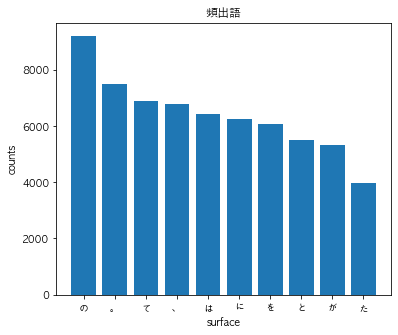

In [8]:
import collections
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
words = []
for dic in dics:
    words.append(dic['surface'])
c = collections.Counter(words)
x = []
y = []
for w in c.most_common()[:10]:
    x.append(w[0])
    y.append(w[1])

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.bar(x, y)
ax.set_xlabel('surface')
ax.set_ylabel('counts')
ax.set_title('頻出語')
plt.show()

### 37. 「猫」と共起頻度の高い上位10語Permalink
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

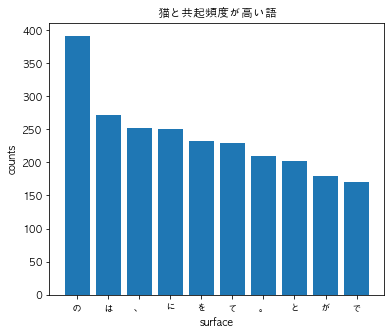

In [9]:
#共起: 任意の文書や文に、ある文字列とある文字列が同時に出現すること

path = '../input/neko.txt.mecab'
with open(path) as f:
    text = f.read().split('\n')

#一文ごとに分割
ls = []
line = []
for w in text:
    if w != 'EOS':
        line.append(w)
    else:
        if w != '':
            ls.append(line)
            line = []

#使用単語を一文単位で取得
ws = []
lines = []
for l in ls:
    for m in l:
        n = m.split('\t')
        ws.append(n[0])
    lines.append(ws)
    ws = []

#「猫」が含まれる文章を抽出
neko_lines = []
for line in lines:
    if '猫' in line:
        neko_lines.append(line)

#「猫」が含まれる文章で使われている単語のリストを作成
neko_words = []
for l in neko_lines:
    for w in l: 
        if w != '猫':
            neko_words.append(w)

import collections
c = collections.Counter(neko_words)

x = []
y = []
for w in c.most_common()[:10]:
    x.append(w[0])
    y.append(w[1])

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.bar(x, y)
ax.set_xlabel('surface')
ax.set_ylabel('counts')
ax.set_title('猫と共起頻度が高い語')
plt.show()

### 38. ヒストグラムPermalink
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

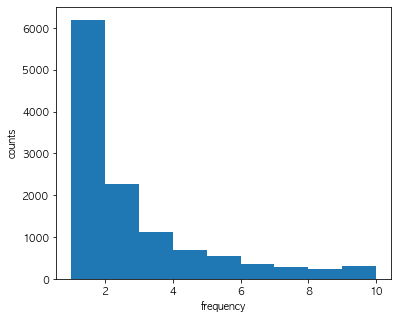

In [12]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
words = []
for dic in dics:
    words.append(dic['surface'])

import collections
c = collections.Counter(words)
_, counts = zip(*c.most_common()[::-1])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.hist(counts, range(1, 11))
ax.set_xlabel('frequency')
ax.set_ylabel('counts')
plt.show()

### 39. Zipfの法則Permalink
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

/Users/Bnaoyuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


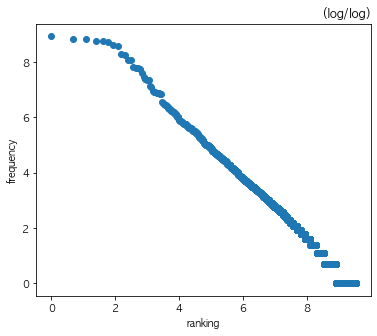

In [15]:
path = '../input/neko.txt.mecab'
dics = keitaiso(path)
words = []
for dic in dics:
    words.append(dic['surface'])

import collections
c = collections.Counter(words)
_, counts = zip(*c.most_common())

import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.scatter(np.log(range(len(counts))), np.log(counts))
ax.set_xlabel('ranking')
ax.set_ylabel('frequency')
ax.set_title('(log/log)', loc='right')
plt.show()